## Building the simplest neural network from scratch

We won’t be using any frameworks here.

In practice, it’s unlikely that anyone will ask you to code a neural network completely from scratch in a real-world job. Libraries such as Keras, TensorFlow, and PyTorch offer tremendous flexibility and make training models straightforward.

While these frameworks make model building easier, they can also hide much of the underlying process. This abstraction can make it harder to develop a strong intuition for how neural networks actually work.

We’ll strip everything back and focus on the simplest possible model so we can really understand what’s happening under the hood.


What we're building:
- A neural network with ONE hidden layer
- Forward propagation (input → hidden → output)
- Backward propagation (gradient descent)
- Two activation functions: Sigmoid and ReLU
- No external ML libraries (only NumPy)


Key components:
1. Weights: Learnable parameters that transform inputs
2. Biases: Learnable offsets
3. Activation functions: Introduce non-linearity
4. Forward pass: Compute predictions
5. Backward pass: Update weights using gradients

<img src="neural_network_from_scratch_1.jpg" alt="Neural Network Diagram" width="400"/>

In [102]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42) # Set random seed for reproducibility

### Define Activation functions

Activation functions defined:  
- **Sigmoid**: $(\frac{1}{1 + e^{-x}})$
- **ReLU**: $( \max(0, x) )$  

In [103]:

def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def sigmoid_derivative(x):
    """Derivative of sigmoid function"""
    return x * (1 - x)

def relu(x):
    """ReLU activation function"""
    return np.maximum(0, x)

def relu_derivative(x):
    """Derivative of ReLU function"""
    return (x > 0).astype(float)


### Create simple neural network

When training a neural network with backpropagation, we compute how much each neuron’s output contributed to the final error. This is done layer by layer from the output back to the inputs.

Gradient Descent happens in the backward() method:
- Step 1: Calculate gradients (derivatives)
- Step 2: Update weights: W = W - learning_rate * gradient
- Learning rate controls step size in gradient descent


In [104]:
class SimpleNeuralNetwork:
    """
    Simplest neural network with one hidden layer
    """
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Step 1: Initialize weights randomly and biases to zero
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))

        # Step 2: Set activation function (like the switch that transforms inputs into a non-linear output)
        self.activation = activation
        if activation == 'sigmoid':
            self.activate = sigmoid
            self.activate_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activate = relu
            self.activate_derivative = relu_derivative
        
        # Store training history
        self.loss_history = []
        
    def forward(self, X):
        """Forward propagation"""
        # Input to hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activate(self.z1)
        
        # Hidden to output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Always use sigmoid for output
        
        return self.a2
    

    def backward(self, X, y, a2, learning_rate):
        """
        Backward propagation with gradient descent
        X  = input (m × n_input)
        y  = target (m × n_output)
        a2 = output activation (m × n_output)
        """
        m = X.shape[0]  # number of samples

        # === STEP 1: Output layer gradients ===
        # ∂L/∂a2 (loss derivative wrt output activation: : how the loss changes if we change the output values)
        dL_da2 = a2 - y  # for MSE loss

        # ∂a2/∂z2 (output activation derivative wrt its weighted input: how the activation output changes if we change the weighted input)
        da2_dz2 = sigmoid_derivative(a2)

        # δ2 = ∂L/∂z2 (output delta)
        delta2 = dL_da2 * da2_dz2

        # === STEP 2: Hidden layer gradients ===
        # ∂L/∂a1 = δ2 · W2ᵀ
        dL_da1 = delta2.dot(self.W2.T)

        # ∂a1/∂z1 (derivative of hidden layer activation)
        da1_dz1 = self.activate_derivative(self.a1)

        # δ1 = ∂L/∂z1 (hidden delta)
        delta1 = dL_da1 * da1_dz1

        # === STEP 3: Gradient descent updates ===
        # Output layer parameters
        dL_dW2 = self.a1.T.dot(delta2) / m
        dL_db2 = np.sum(delta2, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dL_dW2
        self.b2 -= learning_rate * dL_db2

        # Hidden layer parameters
        dL_dW1 = X.T.dot(delta1) / m
        dL_db1 = np.sum(delta1, axis=0, keepdims=True) / m
        self.W1 -= learning_rate * dL_dW1
        self.b1 -= learning_rate * dL_db1

    def train(self, X, y, epochs=100, learning_rate=0.1):
        """Train the neural network"""
        print(f"Training neural network for {epochs} epochs with learning rate {learning_rate}...")
        
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X) #output is a2
            
            # Calculate loss (Mean Squared Error)
            loss = np.mean((y - output) ** 2)
            self.loss_history.append(loss)
            
            # Backward propagation WITH GRADIENT DESCENT
            self.backward(X, y, output, learning_rate)  # ← Pass learning_rate here
            
            # Print progress
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
        print(f"Training completed! Final loss: {self.loss_history[-1]:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return self.forward(X)

### Create simple dataset for binary classification

Dataset created:
Input shape: (100, 2)
Output shape: (100, 1)
X range: [-4.62, 4.72]
y values: [0. 1.]


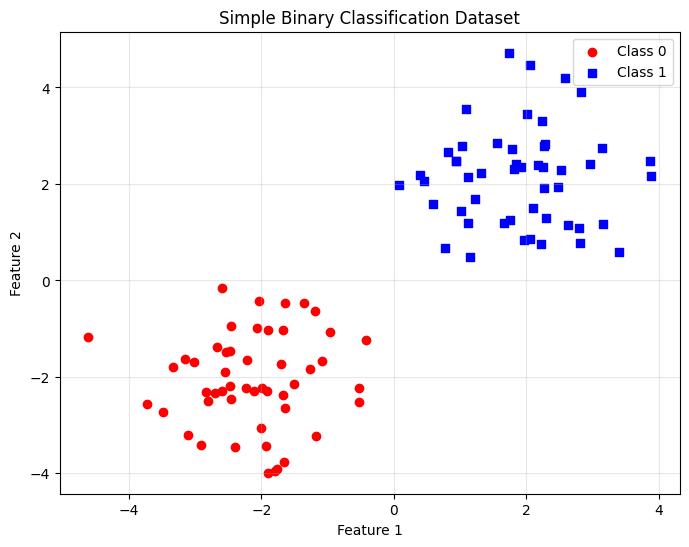

In [105]:
def create_simple_dataset():
    """Create a simple 2D dataset for binary classification"""
    np.random.seed(42)
    
    # Generate two clusters
    class_0 = np.random.randn(50, 2) + [-2, -2]
    class_1 = np.random.randn(50, 2) + [2, 2]
    
    # Combine data
    X = np.vstack([class_0, class_1])
    y = np.vstack([np.zeros((50, 1)), np.ones((50, 1))])
    
    return X, y

# Create dataset
X, y = create_simple_dataset()

print("Dataset created:")
print(f"Input shape: {X.shape}")
print(f"Output shape: {y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y values: {np.unique(y)}")

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Simple Binary Classification Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Train neural network

In [106]:
# Train neural network with sigmoid activation
print("Experiment 1: Neural Network with Sigmoid Activation")
print("-" * 50)

nn_sigmoid = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='sigmoid')
nn_sigmoid.train(X, y, epochs=100, learning_rate=1.0)

# Make predictions
predictions_sigmoid = nn_sigmoid.predict(X)
predictions_binary_sigmoid = (predictions_sigmoid > 0.5).astype(int)

# Calculate accuracy
accuracy_sigmoid = np.mean(predictions_binary_sigmoid == y) * 100
print(f"Sigmoid NN Accuracy: {accuracy_sigmoid:.2f}%")

Experiment 1: Neural Network with Sigmoid Activation
--------------------------------------------------
Training neural network for 100 epochs with learning rate 1.0...
Epoch 0, Loss: 0.345279
Epoch 10, Loss: 0.105979
Epoch 20, Loss: 0.061190
Epoch 30, Loss: 0.042863
Epoch 40, Loss: 0.032232
Epoch 50, Loss: 0.025370
Epoch 60, Loss: 0.020665
Epoch 70, Loss: 0.017288
Epoch 80, Loss: 0.014772
Epoch 90, Loss: 0.012840
Training completed! Final loss: 0.011456
Sigmoid NN Accuracy: 100.00%


In [107]:
# Train neural network with ReLU activation
print("\nExperiment 2: Neural Network with ReLU Activation")
print("-" * 50)

nn_relu = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='relu')
nn_relu.train(X, y, epochs=100, learning_rate=0.01)

# Make predictions
predictions_relu = nn_relu.predict(X)
predictions_binary_relu = (predictions_relu > 0.5).astype(int)

# Calculate accuracy
accuracy_relu = np.mean(predictions_binary_relu == y) * 100
print(f"ReLU NN Accuracy: {accuracy_relu:.2f}%")


Experiment 2: Neural Network with ReLU Activation
--------------------------------------------------
Training neural network for 100 epochs with learning rate 0.01...
Epoch 0, Loss: 0.406181
Epoch 10, Loss: 0.382025
Epoch 20, Loss: 0.356924
Epoch 30, Loss: 0.332328
Epoch 40, Loss: 0.309926
Epoch 50, Loss: 0.289608
Epoch 60, Loss: 0.271525
Epoch 70, Loss: 0.255466
Epoch 80, Loss: 0.241825
Epoch 90, Loss: 0.230203
Training completed! Final loss: 0.221329
ReLU NN Accuracy: 46.00%


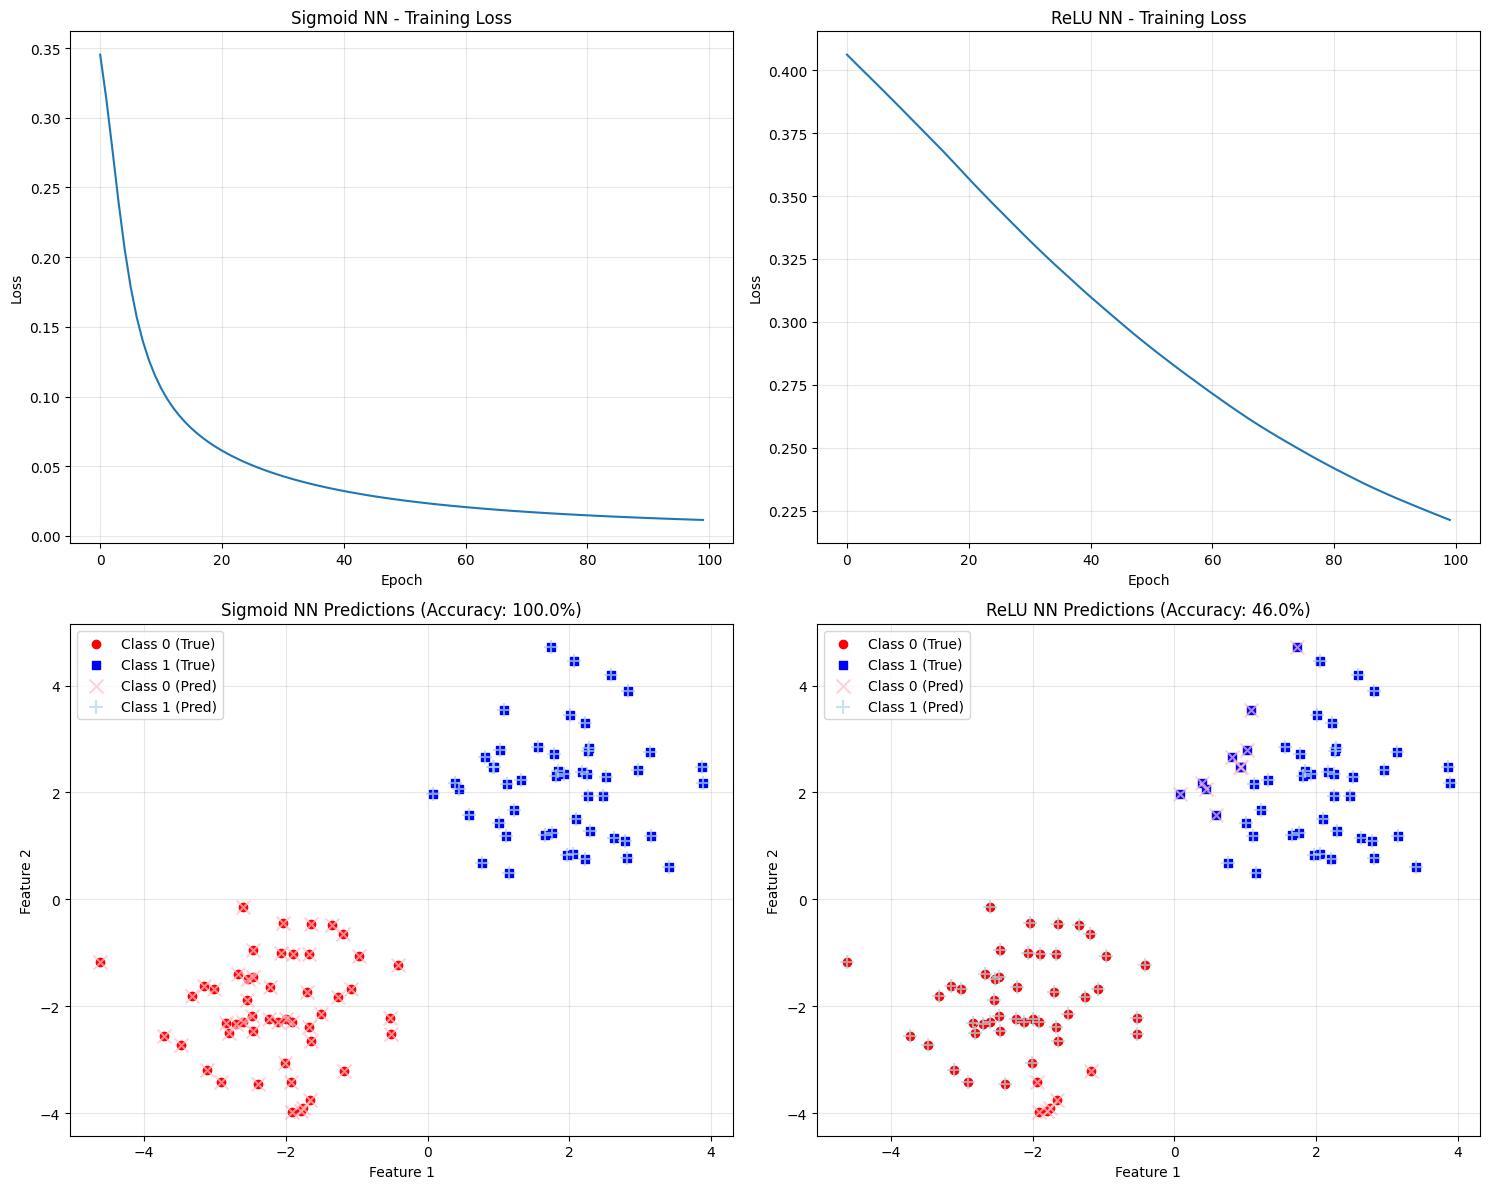

In [108]:
# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Training loss for sigmoid
axes[0, 0].plot(nn_sigmoid.loss_history)
axes[0, 0].set_title('Sigmoid NN - Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Training loss for ReLU
axes[0, 1].plot(nn_relu.loss_history)
axes[0, 1].set_title('ReLU NN - Training Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Sigmoid predictions
axes[1, 0].scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='red', marker='o', label='Class 0 (True)')
axes[1, 0].scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='blue', marker='s', label='Class 1 (True)')
axes[1, 0].scatter(X[predictions_binary_sigmoid.flatten() == 0, 0], X[predictions_binary_sigmoid.flatten() == 0, 1], 
                   c='pink', marker='x', s=100, label='Class 0 (Pred)', alpha=0.7)
axes[1, 0].scatter(X[predictions_binary_sigmoid.flatten() == 1, 0], X[predictions_binary_sigmoid.flatten() == 1, 1], 
                   c='lightblue', marker='+', s=100, label='Class 1 (Pred)', alpha=0.7)
axes[1, 0].set_title(f'Sigmoid NN Predictions (Accuracy: {accuracy_sigmoid:.1f}%)')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: ReLU predictions
axes[1, 1].scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='red', marker='o', label='Class 0 (True)')
axes[1, 1].scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='blue', marker='s', label='Class 1 (True)')
axes[1, 1].scatter(X[predictions_binary_relu.flatten() == 0, 0], X[predictions_binary_relu.flatten() == 0, 1], 
                   c='pink', marker='x', s=100, label='Class 0 (Pred)', alpha=0.7)
axes[1, 1].scatter(X[predictions_binary_relu.flatten() == 1, 0], X[predictions_binary_relu.flatten() == 1, 1], 
                   c='lightblue', marker='+', s=100, label='Class 1 (Pred)', alpha=0.7)
axes[1, 1].set_title(f'ReLU NN Predictions (Accuracy: {accuracy_relu:.1f}%)')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This is obviously a simple dataset that a logistic regression algorithm can easily handle. A simple neural network with no hidden layer (or just one node) and a sigmoid output activation will learn a linear decision boundary. This is why neural networks are called universal function approximators. With enough complexity, they can model any function.